In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
# Install the vaex library

# pip install --pre vaex
# conda install -c conda-forge vaex

import vaex

In [3]:
from pygadget import Simulation, Subfind

In [17]:
# read snap and subfind

from pygadget import Simulation, Subfind

basedir = '/home/patricia/backupragnar/DATA/33306_L11_nc80_version2/'
basename = 'snap_33306_L11_{snapNum:03d}'

snapNum = 128

snap = Simulation(basedir + basename.format(snapNum=snapNum), pot=True)
subs = Subfind(basedir, snapNum, snap=snap)

In [18]:
snap.particle_numbers

{'gas': 1735940,
 'halo': 1759832,
 'disk': 89597,
 'bulge': 29831,
 'stars': 104636,
 'bndry': 16768650}

In [19]:
pos_halo = snap.read_block('pos', 'halo')

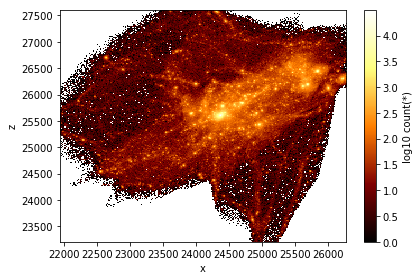

In [20]:
pos_halo = vaex.from_pandas(pos_halo)

pos_halo.plot('x', 'z', f='log10', shape=256)

In [22]:
subs.sublen.argmax()

1169

In [23]:
# read positions blocks

subID = 1169

gas_pos = subs.read_block_by_subhalo('pos', 'gas', subID)[0]
halo_pos = subs.read_block_by_subhalo('pos', 'halo', subID)[0]
stars_pos = subs.read_block_by_subhalo('pos', 'stars', subID)[0]

/home/lbignone/Development/quick_gadget_plot-master/pygadget.py:1191: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  df = df.loc[ids].dropna()


In [28]:
# filter particles around subhalo

center = subs.subpos[subID]
r = 30

filterd_gas_pos = gas_pos[((gas_pos - center)**2).sum(axis=1) < r**2]
filterd_halo_pos = halo_pos[((halo_pos - center)**2).sum(axis=1) < r**2]
filterd_stars_pos = stars_pos[((stars_pos - center)**2).sum(axis=1) < r**2]

In [29]:
# plot options

colors = [plt.cm.Greens_r, plt.cm.Reds_r, plt.cm.Blues_r]
plots = [filterd_halo_pos, filterd_gas_pos, filterd_stars_pos]
names = ['DM', 'gas', 'stars']
shape = 512

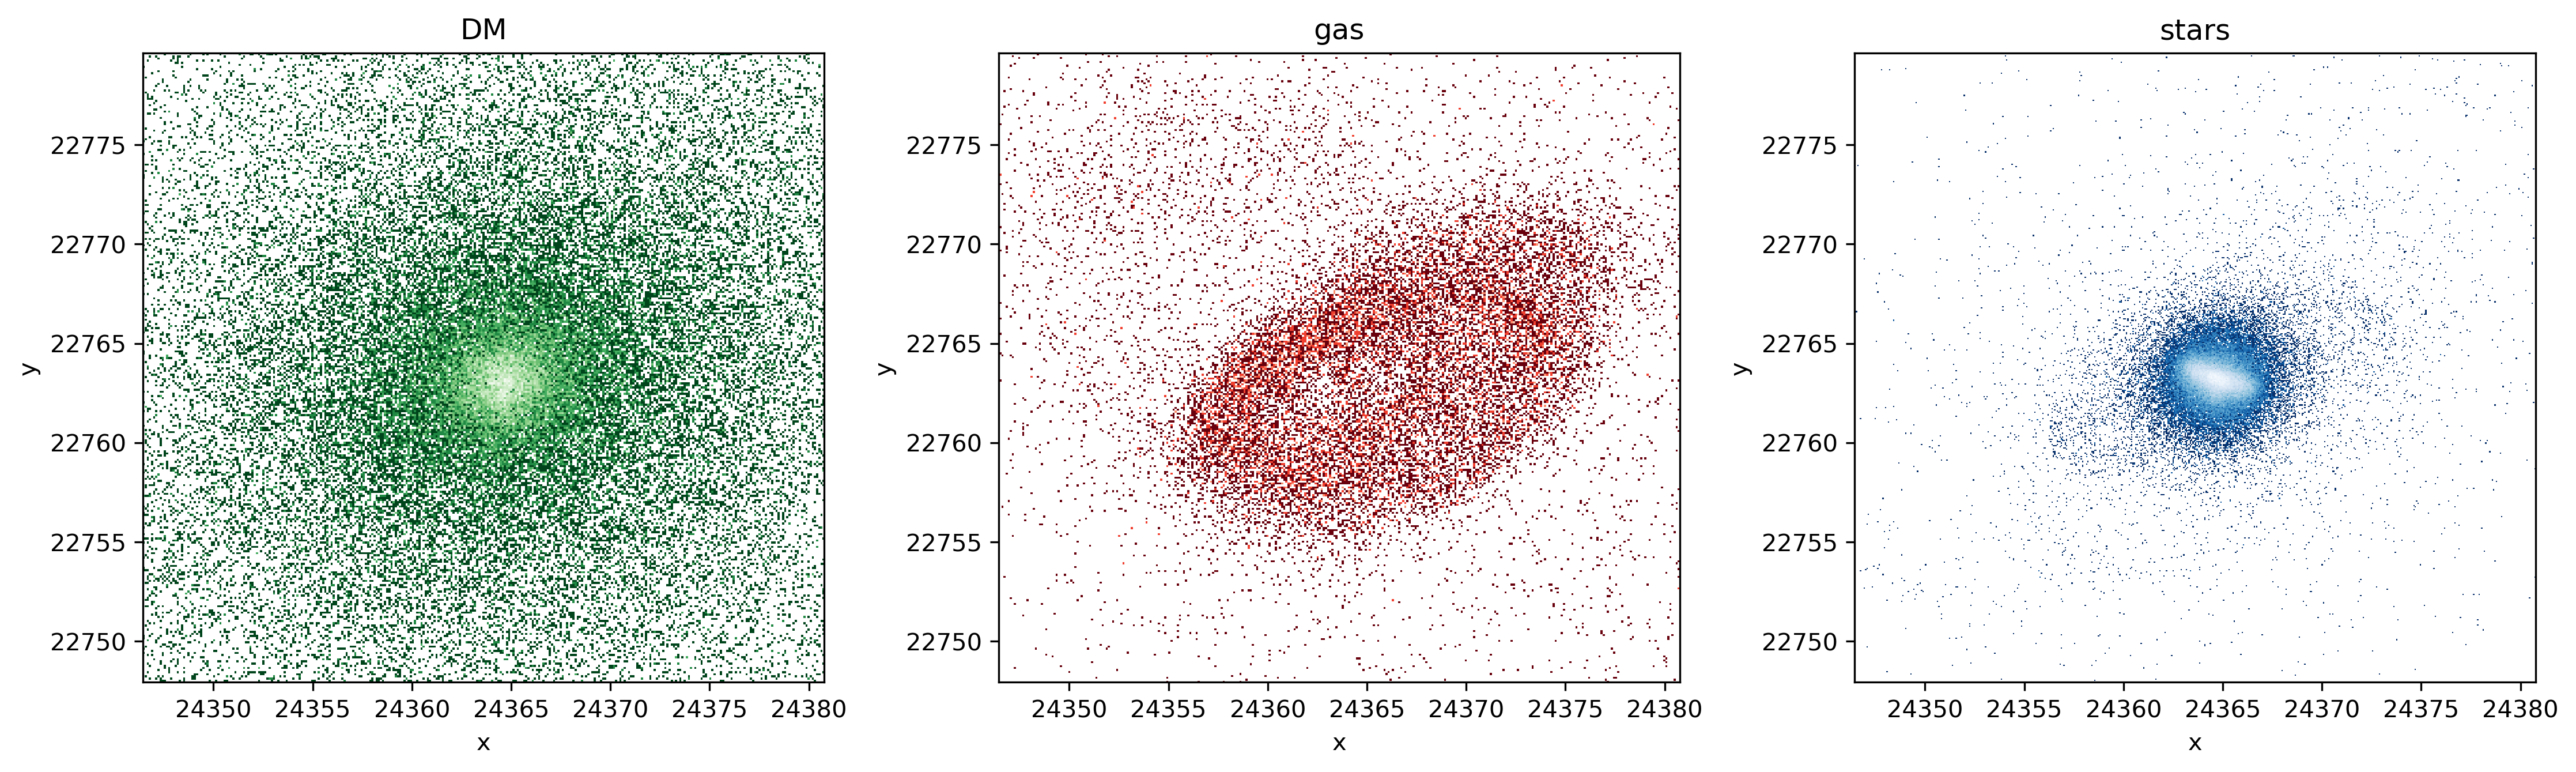

In [31]:
plt.figure(figsize=(15, 5), dpi=300)

axs = []
for i, p in enumerate(plots):
    
    if i==0:
        ax = plt.subplot2grid(shape=(1, len(plots)), loc=(0, i))
    else:
        ax = plt.subplot2grid(shape=(1, len(plots)), loc=(0, i), sharex=axs[0], sharey=axs[0])
    
    axs.append(ax)
    
    ds = vaex.from_pandas(p)
    ds.plot('x', 'y', f='log10', colormap=colors[i], colorbar=False, shape=shape)
    #ax.scatter(p.x, p.y, s=marker_size, c=colors[i])
    ax.set_aspect('equal')
    ax.set_title(names[i])
    
plt.tight_layout()